<a href="https://colab.research.google.com/github/samuelcueva/tensorflow_course_udemy/blob/master/ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.2.0'

## Preprocesado de datos

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

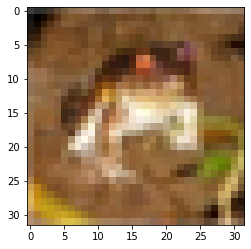

In [5]:
plt.imshow( x_train[0])

In [6]:
x_train=x_train/255.0
x_test=x_test/255.0

In [7]:
dataset=tf.data.Dataset.from_tensor_slices((x_train,y_train))
dataset=dataset.shuffle(50000).batch(32)

In [8]:
print("forma de lote:",next(iter(dataset.take(1)))[0].shape)

forma de lote: (32, 32, 32, 3)


## Construcción del modelo

In [105]:
accuracy=[]
times=[]
epochs=[]

In [106]:
from time import time
class callback_time(tf.keras.callbacks.Callback):
  def __init__(self):
    super(callback_time,self).__init__()
    self.times=[]
    self.start=0
    
  def on_epoch_begin(self,epoch,logs={}):
    self.start=time()
  
  def on_epoch_end(self,epoch,logs={}):
    self.times.append(time()-self.start)

  



  

In [116]:
def build_model(units_per_block,kernel_per_block,lr):
  model=tf.keras.Sequential([
                             #block 1
                             tf.keras.layers.Conv2D(units_per_block[0],kernel_size=kernel_per_block[0],padding="same",activation="relu",input_shape=(32,32,3)),
                             tf.keras.layers.Conv2D(units_per_block[0],kernel_size=kernel_per_block[0],padding="same",activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                             #block 2
                             tf.keras.layers.Conv2D(units_per_block[1],kernel_size=kernel_per_block[1],padding="same",activation="relu"),
                             tf.keras.layers.Conv2D(units_per_block[1],kernel_size=kernel_per_block[1],padding="same",activation="relu"),
                             tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
                             #block 3
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(units_per_block[2],activation="relu"),
                             tf.keras.layers.Dense(10,activation="softmax")
                             
  ])
  optimizer=tf.keras.optimizers.Adam(lr)
  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["sparse_categorical_accuracy"])
  return model,[units_per_block,kernel_per_block,lr]



In [117]:
model,hiperparametros=build_model([32,64,128],[3,3],0.001)
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_76 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_77 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_78 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 4096)            

In [118]:
my_callback=callback_time()
#model.fit(dataset,epochs=5,callbacks=[my_callback])
history=model.fit(x_train,y_train,epochs=25,callbacks=[my_callback])


Epoch 1/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3883 - sparse_categorical_accuracy: 0.4990
Epoch 2/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9608 - sparse_categorical_accuracy: 0.6610
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7887 - sparse_categorical_accuracy: 0.7236
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6809 - sparse_categorical_accuracy: 0.7603
Epoch 5/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5958 - sparse_categorical_accuracy: 0.7868
Epoch 6/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5247 - sparse_categorical_accuracy: 0.8133
Epoch 7/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4588 - sparse_categorical_accuracy: 0.8366
Epoch 8/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4100 - sparse_categorical_accuracy: 0.8551
Epoch 9/25
1563/1563 [==========

In [119]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
accuracy.append((hiperparametros,test_accuracy))
times.append(float(np.sum(my_callback.times)))
epochs.append(len(history.epoch))

313/313 [==============================] - 1s 3ms/step - loss: 1.3749 - sparse_categorical_accuracy: 0.7486


In [120]:
c=0
for hiper,accu in accuracy:
  c+=1
  print("ejecución {} ---> epochs: {},  hiperp: {},  tiempo total: {:.4f},  accuracy: {:.4f}".format(c,epochs[c-1],hiper,times[c-1],accu))

ejecución 1 ---> epochs: 5,  hiperp: [[32, 64, 128], [3, 3], 0.001],  tiempo total: 33.1111,  accuracy: 0.7433
ejecución 2 ---> epochs: 25,  hiperp: [[32, 64, 128], [3, 3], 0.001],  tiempo total: 159.7293,  accuracy: 0.7181
ejecución 3 ---> epochs: 25,  hiperp: [[32, 64, 128], [3, 3], 0.001],  tiempo total: 160.3143,  accuracy: 0.7486


In [60]:
!nvidia-smi

Wed Jul 29 01:39:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.51.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    33W /  70W |    877MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------